In [1]:
import tensorflow as tsf
from numpy import unique,argmax
from matplotlib import pyplot
import matplotlib.pyplot as plt
import numpy as np

In [2]:
mnist = tsf.keras.datasets.mnist
(x_train,y_train),(x_test,y_test) = mnist.load_data()

11501568/11490434 [==============================] - 0s 0us/step


In [3]:
x_train = x_train.reshape((x_train.shape[0],x_train.shape[1],x_train.shape[2],1))
x_test = x_test.reshape((x_test.shape[0],x_test.shape[1],x_test.shape[2],1))

In [4]:
x_train = x_train.astype('float32')/255.0
x_test = x_test.astype('float32')/255.0

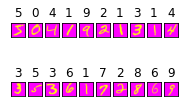

In [9]:
fig = plt.figure(figsize = (3,2))
for i in range(20):
    ax = fig.add_subplot(2,10,i+1,xticks =[],yticks = [])
    ax.imshow(np.squeeze(x_train[i]),cmap = 'spring')
    ax.set_title(y_train[i])


In [ ]:
img_shape = x_train.shape[1:]
img_shape

(28, 28, 1)

In [ ]:
import tensorflow as tfs
model = tsf.keras.models.Sequential([tsf.keras.layers.Flatten(input_shape=(28, 28)),

  tsf.keras.layers.Dense(128, activation='relu'),

  tsf.keras.layers.Dropout(0.2),

  tsf.keras.layers.Dense(10)])

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 128)               100480    
_________________________________________________________________
dropout (Dropout)            (None, 128)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 10)                1290      
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________


In [ ]:
predictions = model(x_train[:1]).numpy()

predictions

array([[ 0.2164941 , -0.3077578 , -0.41087428, -0.14100903,  0.1964376 ,
         0.142781  ,  0.32523435, -0.21064122,  0.45882362,  0.13442457]],
      dtype=float32)

In [ ]:
tsf.nn.softmax(predictions).numpy()

array([[0.11497998, 0.06806793, 0.06139876, 0.08041936, 0.11269686,
        0.1068093 , 0.12818804, 0.0750101 , 0.14650911, 0.10592047]],
      dtype=float32)

In [ ]:
loss_fn = tsf.keras.losses.SparseCategoricalCrossentropy(from_logits=True)
loss_fn(y_train[:1], predictions).numpy()
model.compile(optimizer='adam',loss=loss_fn, metrics=['accuracy'])

In [ ]:
model.fit(x_train, y_train, epochs=5)


Epoch 1/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2949 - accuracy: 0.9151
Epoch 2/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1455 - accuracy: 0.9578
Epoch 3/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1082 - accuracy: 0.9671
Epoch 4/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0903 - accuracy: 0.9719
Epoch 5/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0753 - accuracy: 0.9766


In [ ]:
model.evaluate(x_test,  y_test, verbose=5)


[0.0837613120675087, 0.9743000268936157]

In [ ]:
probability_model = tsf.keras.Sequential([ model, tsf.keras.layers.Softmax() ])
probability_model(x_test[:5])

<tf.Tensor: shape=(5, 10), dtype=float32, numpy=
array([[1.4638146e-31, 5.7515699e-24, 1.1294311e-18, 0.0000000e+00,
        1.0000000e+00, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
        1.2553769e-38, 2.3249483e-35],
       [0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
        2.0455137e-22, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
        0.0000000e+00, 1.0000000e+00],
       [1.0142247e-33, 1.3433073e-32, 2.4183536e-01, 3.5690245e-32,
        5.9881512e-02, 0.0000000e+00, 2.6755835e-26, 0.0000000e+00,
        0.0000000e+00, 6.9828314e-01],
       [0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 2.1927284e-34,
        6.3621275e-11, 0.0000000e+00, 2.0547144e-11, 0.0000000e+00,
        1.0000000e+00, 2.8979909e-16],
       [0.0000000e+00, 1.6339867e-33, 1.0174260e-25, 0.0000000e+00,
        1.3581206e-10, 0.0000000e+00, 4.3548159e-02, 0.0000000e+00,
        9.5645189e-01, 9.4325380e-35]], dtype=float32)>

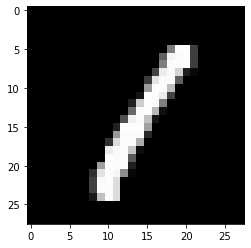

In [ ]:
img = x_train[3]
plt.imshow(np.squeeze(img) ,cmap='gray')
plt.show()

In [ ]:
img= img.reshape(1, img.shape[0],img.shape[1],img.shape[2])
p= model.predict([img])
print("predicted is : {}".format(argmax(p)))

predicted is : 2
